# Artificial Intelligence Systems Lab 6

## Task
1. Датасет о диабете: Diabetes Dataset
2. Загрузите выбранный датасет и выполните предварительную обработку данных. 
3. Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).
4. Разделите данные на обучающий и тестовый наборы в соотношении, которое вы считаете подходящим.
5. Реализуйте логистическую регрессию "с нуля" без использования сторонних библиотек, кроме NumPy и Pandas. Ваша реализация логистической регрессии должна включать в себя:
    - Функцию для вычисления гипотезы (sigmoid function).
    - Функцию для вычисления функции потерь (log loss).
    - Метод обучения, который включает в себя градиентный спуск.
    - Возможность варьировать гиперпараметры, такие как коэффициент обучения (learning rate) и количество итераций.
6. Исследование гиперпараметров:
    - Коэффициент обучения (learning rate).
    - Количество итераций обучения.
    - Метод оптимизации (например, градиентный спуск или оптимизация Ньютона).
7. Оценка модели: Для каждой комбинации гиперпараметров оцените производительность модели на тестовом наборе данных, используя метрики, такие как accuracy, precision, recall и F1-Score.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Load the data & visualize dataset statistics
dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Missing values check

print('Missing values check')
print(dataset.isnull().sum())

Missing values check
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [4]:
# Encoding categorical data
def encode_categorical_data(data):
    for column in data.columns:
        if data[column].dtype == 'object':
            data[column] = data[column].astype('category').cat.codes


encode_categorical_data(dataset)
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# Normalize the data
def normalize_data(data):
    for column in data.columns:
        data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())


normalize_data(dataset)
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


In [6]:
# Dataset statistics
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


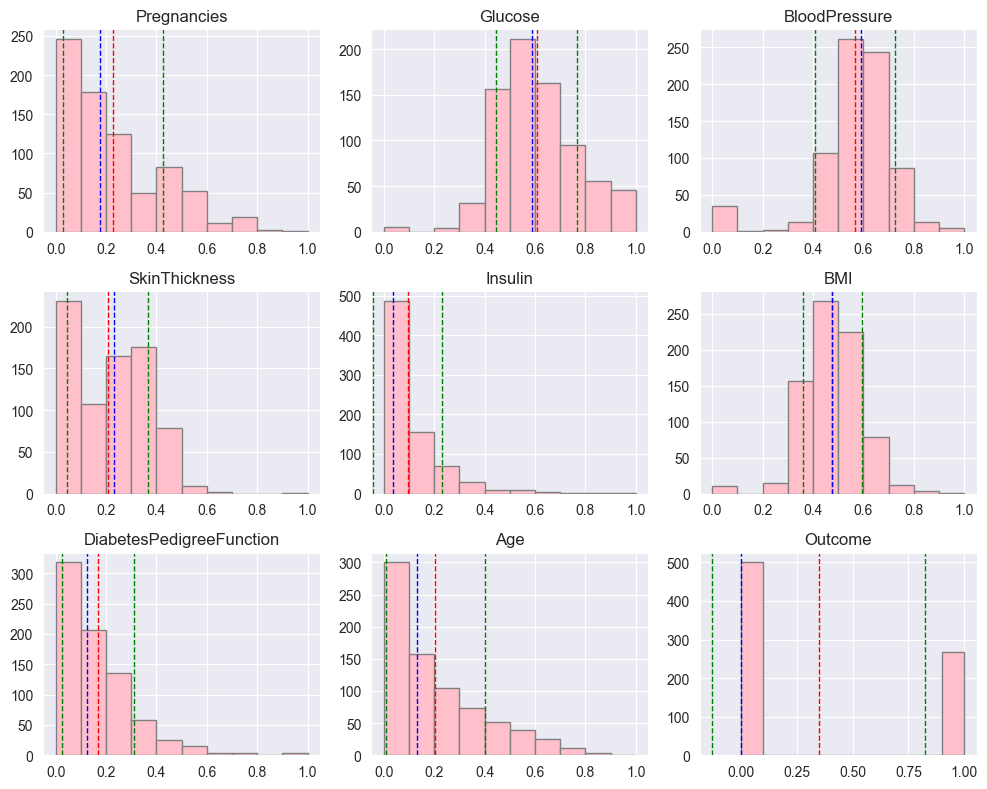

In [7]:
# Histogram of each column with standard deviation lines and midlines

# Create a figure
frame = plt.figure(figsize=(10, 8))
# Calculate the number of intervals
intervals = 1 + np.log2(len(dataset))
# Iterate over each numerical column
numerical_columns = dataset.select_dtypes(include=[np.number])
for column in numerical_columns.columns:
    # Add a subplot for each column
    tmp = frame.add_subplot(3, 3, list(numerical_columns.columns).index(column) + 1)
    # Get the column data
    column_data = dataset[column]
    # Calculate the standard deviation, mean and median of the column
    std_value = column_data.std()
    mean_value = column_data.mean()
    median_value = column_data.median()
    # Plot the histogram
    tmp.hist(column_data, bins=int(intervals), color='pink', edgecolor='gray')

    # Add the standard deviation, mean lines and median line
    tmp.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label='Mean')
    tmp.axvline(mean_value + std_value, color='green', linestyle='dashed', linewidth=1, label='Mean + 1 STD')
    tmp.axvline(mean_value - std_value, color='green', linestyle='dashed', linewidth=1, label='Mean - 1 STD')
    tmp.axvline(median_value, color='blue', linestyle='dashed', linewidth=1, label='Median')
    tmp.set_title(column)

plt.tight_layout()
plt.show()

In [8]:
# Quantiles of each numerical column

print('Quantiles of each numerical column')
print(numerical_columns.quantile([0.25, 0.5, 0.75]))

Quantiles of each numerical column
      Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0.25     0.058824  0.497487       0.508197       0.000000  0.000000  0.406855   
0.50     0.176471  0.587940       0.590164       0.232323  0.036052  0.476900   
0.75     0.352941  0.704774       0.655738       0.323232  0.150414  0.545455   

      DiabetesPedigreeFunction       Age  Outcome  
0.25                  0.070773  0.050000      0.0  
0.50                  0.125747  0.133333      0.0  
0.75                  0.234095  0.333333      1.0  


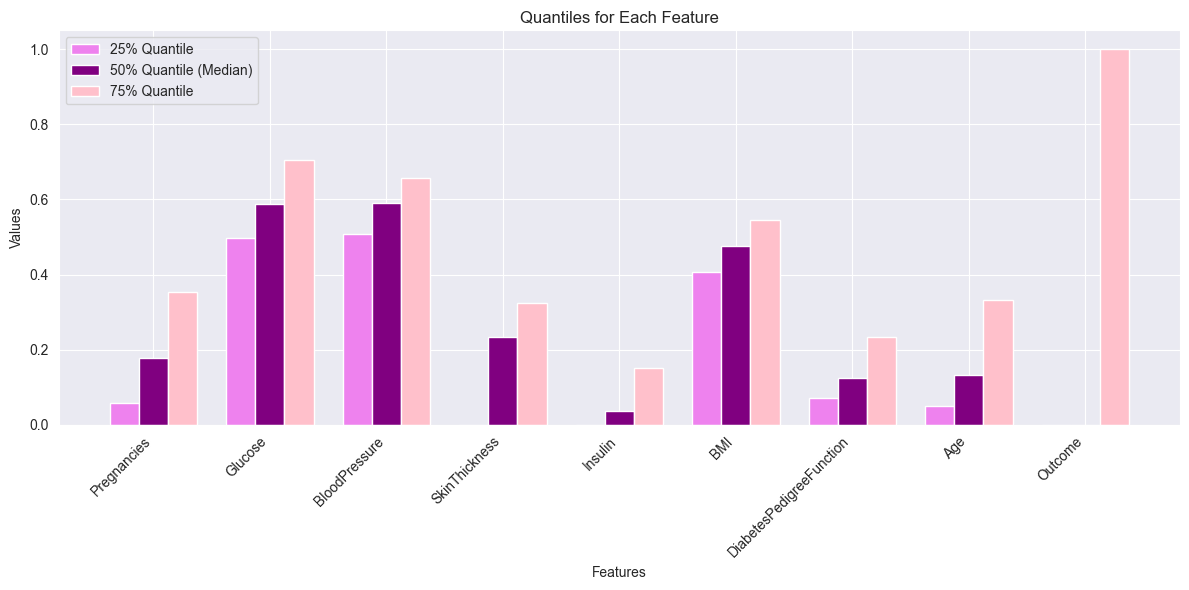

In [14]:
# Visualization of Quantiles of each numerical column
quantiles = numerical_columns.quantile([0.25, 0.5, 0.75])

# Create a figure
fig, ax = plt.subplots(figsize=(12, 6))

# Bar width and x indexes
x = numerical_columns.columns
bar_width = 0.25

# X indexes for each quantile
x_indexes = np.arange(len(x))
x_25 = x_indexes - bar_width
x_50 = x_indexes
x_75 = x_indexes + bar_width

# Plot the bars
ax.bar(x_25, quantiles.loc[0.25], width=bar_width, label='25% Quantile', color='violet')
ax.bar(x_50, quantiles.loc[0.5], width=bar_width, label='50% Quantile (Median)', color='purple')
ax.bar(x_75, quantiles.loc[0.75], width=bar_width, label='75% Quantile', color='pink')

# Plot configs
ax.set_xticks(x_indexes)
ax.set_xticklabels(x, rotation=45, ha='right')
ax.set_title('Quantiles for Each Feature')
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [15]:
# Split the dataset into training and testing datasets

train_dataset = dataset[:int(len(dataset) * 0.8)]
test_dataset = dataset[int(len(dataset) * 0.8):]

# Split the target column from the features
X_train = train_dataset.drop('Outcome', axis=1)
y_train = train_dataset['Outcome']
X_test = test_dataset.drop('Outcome', axis=1)
y_test = test_dataset['Outcome']

In [16]:
from sklearn.linear_model import LogisticRegression
import numpy as np


# Функция сигмоиды
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# Логарифмическая функция потерь
def log_loss(y, y_pred):
    epsilon = 1e-10
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    m = len(y)
    return -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / m


# Градиентный спуск
def train_logistic_regression(X, y, learning_rate=0.01, iterations=1000):
    weights = np.zeros(X.shape[1])
    losses = []

    for i in range(iterations):
        predictions = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (predictions - y)) / len(y)
        weights -= learning_rate * gradient
        loss = log_loss(y, predictions)
        losses.append(loss)

        if i % 100 == 0:
            print(f"Iteration {i}, Loss: {loss:.4f}")

    return weights, losses


# Функция предсказания
def predict(X, weights, threshold=0.5):
    probabilities = sigmoid(np.dot(X, weights))
    return (probabilities >= threshold).astype(int)


learning_rate = 0.01
iterations = 5000
weights, losses = train_logistic_regression(X_train, y_train, learning_rate, iterations)

# Оценка на тестовой выборке
predictions = predict(X_test, weights)
accuracy = np.mean(predictions == y_test) * 100
print(f"\nAccuracy on Test Set: {accuracy:.2f}%")

# Печатаем результаты
print("\nFinal Weights:", weights)
print("Predictions on Test Set:", predictions)
print("Actual Labels:", y_test)

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
y_pred = logmodel.predict(X_test)


Iteration 0, Loss: 0.6931
Iteration 100, Loss: 0.6822
Iteration 200, Loss: 0.6756
Iteration 300, Loss: 0.6715
Iteration 400, Loss: 0.6688
Iteration 500, Loss: 0.6669
Iteration 600, Loss: 0.6654
Iteration 700, Loss: 0.6643
Iteration 800, Loss: 0.6633
Iteration 900, Loss: 0.6625
Iteration 1000, Loss: 0.6616
Iteration 1100, Loss: 0.6609
Iteration 1200, Loss: 0.6601
Iteration 1300, Loss: 0.6594
Iteration 1400, Loss: 0.6587
Iteration 1500, Loss: 0.6580
Iteration 1600, Loss: 0.6574
Iteration 1700, Loss: 0.6567
Iteration 1800, Loss: 0.6560
Iteration 1900, Loss: 0.6554
Iteration 2000, Loss: 0.6548
Iteration 2100, Loss: 0.6542
Iteration 2200, Loss: 0.6535
Iteration 2300, Loss: 0.6529
Iteration 2400, Loss: 0.6523
Iteration 2500, Loss: 0.6518
Iteration 2600, Loss: 0.6512
Iteration 2700, Loss: 0.6506
Iteration 2800, Loss: 0.6501
Iteration 2900, Loss: 0.6495
Iteration 3000, Loss: 0.6490
Iteration 3100, Loss: 0.6484
Iteration 3200, Loss: 0.6479
Iteration 3300, Loss: 0.6474
Iteration 3400, Loss: 0.64